<a href="https://colab.research.google.com/github/elmedianikhadija/PFE-WITH-SIR/blob/main/FRANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
!{sys.executable} -m pip install --user --quiet pandas>=1.0.3 matplotlib scipy numpy

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

In [3]:
infected_original2 = pd.read_csv("/content/infectedDATA.csv") 

infected_original2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178901,178901,178905,178919,178922,178981,179010,179017,179131,179169
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275191,275211,275266,275310,275341,275366,275372,275416,275440,275485
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265782,265782,265786,265791,265794,265798,265800,265804,265806,265808
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41349,41717,41717,41717,41717,41717,41717,41717,41717,42156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [4]:
recovered_original2 = pd.read_csv("/content/recoveredDATA.csv") 

recovered_original2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
deaths_original2 = pd.read_csv("/content/deathsDATA.csv") 

deaths_original2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/22,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7683,7683,7684,7684,7684,7684,7685,7685,7686,7686
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [6]:
countries = pd.read_csv("/content/countriesDATA.csv") 

countries.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


In [7]:
population = countries[countries['Province_State'].isnull()][['Country_Region','Population']].rename(columns={'Country_Region' : 'Country/Region'}).set_index('Country/Region')
population.head()

,Population
Country/Region,
Afghanistan,38928341.0
Albania,2877800.0
Antarctica,NaN
Algeria,43851043.0
Andorra,77265.0


In [8]:
infected = infected_original2.groupby('Country/Region').sum().reset_index().set_index('Country/Region').join(population,on='Country/Region')
infected.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,Population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,178901,178905,178919,178922,178981,179010,179017,179131,179169,38928341.0
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,275211,275266,275310,275341,275366,275372,275416,275440,275485,2877800.0
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,265782,265786,265791,265794,265798,265800,265804,265806,265808,43851043.0
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,41717,41717,41717,41717,41717,41717,41717,41717,42156,77265.0
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,32866268.0


In [12]:
deaths = deaths_original2.groupby('Country/Region').sum().reset_index().set_index('Country/Region').join(population,on='Country/Region')
deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,Population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,7683,7684,7684,7684,7684,7685,7685,7686,7686,38928341.0
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3497,3497,3497,3497,3497,2877800.0
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,43851043.0
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,77265.0
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,32866268.0


In [13]:
recovered = recovered_original2.groupby('Country/Region').sum().reset_index().set_index('Country/Region').join(population,on='Country/Region')
recovered.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/22,5/5/22,5/6/22,5/7/22,5/8/22,5/9/22,5/10/22,5/11/22,5/12/22,Population
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38928341.0
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877800.0
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43851043.0
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,77265.0
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32866268.0


In [14]:
# Les équations différentielles du modèle SIR.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Calculer le modèle SIR à partir d'un nombre donné de personnes infectées/enlevées.
def sir_model(infected,removed,N,beta,gamma,ndays):
    t = np.linspace(0,ndays,ndays)
    y0 = N-infected-removed,infected,removed
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    return ret.T # S,I,R

In [15]:
# Modèle sur un vecteur donné de malades V et de distants R
def model(V,R,N,beta,gamma):
    S,I,R = sir_model(V[0],R[0],N,beta,gamma,len(V))
    dV = np.diff(V)
    dI = np.diff(I+R)
    return np.linalg.norm(dV-dI)

# Fixer le paramètre gamma
the_gamma = 1/30

# Faire correspondre les paramètres du modèle aux vecteurs V et R
def fit(V,R,N):
    # res = minimize(lambda x:model(V,R,N,x[0],x[1]),x0=[0.5,1/20],method='powell')
    # return res.x[0],res.x[1]
    res = minimize(lambda x:model(V,R,N,x,the_gamma),x0=0.5,method='powell')
    return res.x,the_gamma

In [16]:
def make_frame(country_name,smooth_window=3):
    f = pd.DataFrame([infected.loc[country_name],recovered.loc[country_name],deaths.loc[country_name]]).T
    population = f.iloc[-1,0]
    f = f.iloc[2:-1].reset_index()
    f.columns = ['Date','Infected','Recovered','Deaths']
    f['Removed'] = f['Recovered']+f['Deaths']
    f["Date"] = pd.to_datetime(f["Date"],format="%m/%d/%y")
    for x in ['Infected','Recovered','Deaths','Removed']:
        f[x+"_Av"] = f[x].rolling(window=smooth_window).mean()
    return population, f

def get_start_index(df):
    return df[df['Infected_Av']>1000].index[0]

In [17]:
def compute_params(df,population, start_index, ndays=8):
    for i in range(start_index,len(df)-ndays):
        V = df['Infected_Av'][i:i+ndays].to_numpy()
        R = df['Removed_Av'][i:i+ndays].to_numpy()
        beta,gamma = fit(V,R,population)
        df.loc[i,'Beta'] = beta
        df.loc[i,'Gamma'] = gamma

In [18]:
def analyze(country_name,truncate_frame=True):
    population, df = make_frame(country_name)
    n = get_start_index(df)
    compute_params(df,population,n)
    df['Rt'] = df['Beta'] / df['Gamma']
    return population, df.iloc[n:] if truncate_frame else df

pop, df = analyze('France')

In [19]:
df.head()

,Date,Infected,Recovered,Deaths,Removed,Infected_Av,Recovered_Av,Deaths_Av,Removed_Av,Beta,Gamma,Rt
47,2020-03-09,1411.0,12.0,25.0,37.0,1161.333333,12.0,20.000000,32.000000,0.205787,0.033333,6.173621
48,2020-03-10,1783.0,12.0,33.0,45.0,1439.666667,12.0,25.666667,37.666667,0.200235,0.033333,6.007047
49,2020-03-11,2293.0,12.0,48.0,60.0,1829.000000,12.0,35.333333,47.333333,0.199639,0.033333,5.989156
50,2020-03-12,2293.0,12.0,48.0,60.0,2123.000000,12.0,43.000000,55.000000,0.197070,0.033333,5.912089
51,2020-03-13,3681.0,12.0,79.0,91.0,2755.666667,12.0,58.333333,70.333333,0.185280,0.033333,5.558392


In [25]:
# Population, N.
N = 365249843
# Nombre initial d'infectés et de guéris, I0 et R0.
I0, R0 = 100, 0
# Les autres (S0) sont potentiellement sensibles
S0 = N - I0 - R0

# Coefficient de transmission bêta et temps moyen inverse de récupération gamma (en 1/jour).
beta, gamma = 0.185280, 1./30

# Nombre de jours à calculer :
days = 1000

In [26]:
t = np.linspace(0, days, days)

In [27]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [28]:
# Initial Vector
y0 = S0, I0, R0
# Solve SIR equations on time grid t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

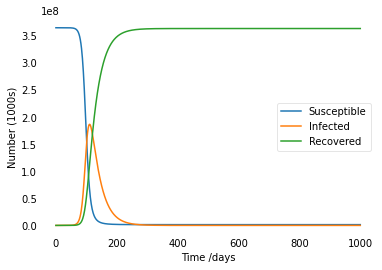

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(S,label='Susceptible')
ax.plot(I,label='Infected')
ax.plot(R,label='Recovered')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [30]:
print("R0={}".format(beta/gamma))

R0=5.5584
